In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(tibble)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
connectivity_table<- readRDS('../Pathogen_JC14_3DM/WGCNA_output_all/RDS/connectivity_info.rds')

In [3]:
connectivity_table <- connectivity_table %>% dplyr::mutate( module  = (module %>% str_replace_all('MEcyan','MEruby') %>%
                        str_replace_all('MEmidnightblue','MEorange') 
                                                
                                                ))

In [4]:
connectivity_table %>% sample_n(10)

gene,connectivity_rowSums_adj,module,gene_name,DM6/DM7,DM1/DM2d,DM10/DM11,AvrRpt2-6h,AvrRpt2-12h,AvrRpt2-20h,AvrRps4-6h,AvrRps4-12h,AvrRps4-20h,DM1/DM2d_adr1s,Col-0_adr1s,DM6/DM7_adr1s
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AT3G57040,1539.2800,MEblue,ARR9,-0.95404741,-1.1259569,-1.5294654,-0.18403568,-1.0248561,-1.9206310,-0.41582322,-0.9902311,-1.817871,-0.30184963,2.90278905,-0.14293277
AT4G04020,114.0915,MEpurple,FIB,-2.07426308,-0.4942560,1.0575877,-0.21102835,-0.6697191,-1.2715682,0.07399314,-0.6262234,-1.117470,-0.12095416,2.85085046,-1.17321232
AT3G58750,1917.2804,MEruby,CSY2,1.52752820,2.2928154,2.0803487,0.34287028,0.9294931,2.0758008,0.34270975,0.8673791,1.754539,0.34921053,-1.41059260,0.23840160
AT2G32550,1039.6633,MEblue,NOT9C,2.88086574,1.9057121,-2.2291256,0.31300216,-0.1475401,-2.8512630,-0.20038688,-0.0783769,-2.977756,-0.32120525,4.00159386,1.60074613
AT3G11840,1904.3663,MEruby,PUB24,2.06713890,2.2622534,6.1810056,0.68805061,1.6312885,3.6921480,0.52397657,1.1643608,3.353640,1.92390845,-2.32751566,0.63666327
AT3G16410,930.6232,MEblue,NSP4,-4.02523567,-4.4911572,-0.5596065,-0.04803535,0.8581061,1.2075338,0.22469750,1.1325007,1.479703,-1.09957820,2.60178431,-1.20099829
AT5G58210,1296.4059,MEruby,AT5G58210,-0.07655324,0.1384019,0.5162589,-0.07468133,-0.2048654,0.1299902,-0.04078845,-0.4073959,0.244994,-0.04914598,0.60663595,-0.12428967
AT2G17780,168.8718,MEpurple,MCA2,-0.33729247,-2.7520977,-2.1455653,-0.13282575,-0.8137107,-1.0683444,-0.09016921,-0.6584133,-1.217900,-0.41147771,-0.13062660,-0.07891437
AT4G12040,1894.2390,MEruby,SAP7,0.45937709,0.9796253,1.3796990,0.46469737,0.8133087,1.4762065,0.23120750,0.7712729,1.193142,0.33945778,-0.63659471,-0.20853165


In [5]:
library(dplyr)
library(readr)

# Define file paths
input_bed_path <- "/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/TOBIAS/BINDetect_output_v3/DOF4.7_AT4G38000/beds/DOF4.7_AT4G38000_DM_bound.bed"

output_dir <- "/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/TOBIAS/BINDetect_output_v3/DOF4.7_AT4G38000/beds/"

# Read the BED file and the connectivity table
bed_file <- read_delim(input_bed_path, delim = "\t", col_names = FALSE)

# Function to filter and write out BED files
create_filtered_bed_files <- function(bed_file, connectivity_table, output_dir) {
  unique_modules <- unique(connectivity_table$module)
  
  for (current_module in unique_modules) {
    print(current_module)
    genes_in_module <- connectivity_table %>% 
                       filter(module == current_module) %>% 
                       pull(gene)
    print(length(genes_in_module))
    
    filtered_bed <- bed_file %>% 
                    filter(X13 %in% genes_in_module)
    
    write_tsv(filtered_bed, file.path(output_dir, paste0("DOF4.7_AT4G38000_DM_bound_in_", current_module, ".bed")))
  }
}

# Example usage of the function
create_filtered_bed_files(bed_file, connectivity_table, output_dir)


Rows: 2904 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (9): X1, X4, X6, X7, X10, X11, X12, X13, X14
dbl (6): X2, X3, X5, X8, X9, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "MEruby"
[1] 2490
[1] "MEblue"
[1] 2222
[1] "MEpurple"
[1] 234
[1] "MEdarkred"
[1] 93
[1] "MEgreenyellow"
[1] 93
[1] "MEtan"
[1] 84
[1] "MEdarkgreen"
[1] 84
[1] "MEsalmon"
[1] 63
[1] "MEorange"
[1] 58
[1] "MEdarkturquoise"
[1] 33


In [6]:
library(dplyr)
library(readr)

# Base directory path
base_dir <- "/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/TOBIAS/BINDetect_output_v3"

process_tf_directory <- function(tf_name, connectivity_table) {
  # Construct full directory path
  tf_dir <- file.path(base_dir, tf_name)

  # Define file paths
  input_bed_dir <- file.path(tf_dir, "beds")
  output_dir <- file.path(tf_dir, "beds", "WGCNA_output")

  # Create output directory if it does not exist
  if (!dir.exists(output_dir)) {
    dir.create(output_dir)
  }

  # List all bed files in the input directory, excluding 'all.bed'
  bed_files <- list.files(input_bed_dir, pattern = "\\.bed$", full.names = TRUE)
  bed_files <- bed_files[!grepl("all\\.bed$", bed_files)]
  # print(bed_files) # Debugging: print the list of bed files to be processed

    # Function to filter and write out BED files
    create_filtered_bed_files <- function(bed_file_path, connectivity_table, output_dir) {
      bed_file <- read_delim(bed_file_path, delim = "\t", col_names = FALSE)
      unique_modules <- unique(connectivity_table$module)

      for (current_module in unique_modules) {
        genes_in_module <- connectivity_table %>%
                           filter(module == current_module) %>%
                           pull(gene)

        filtered_bed <- bed_file %>%
                        filter(X13 %in% genes_in_module)

        # Generate a safe file name
        base_name <- basename(bed_file_path)
        file_name <- paste0(tools::file_path_sans_ext(base_name), "_in_", current_module, ".bed")
        write_tsv(filtered_bed, file.path(output_dir, file_name), col_names = FALSE)
      }
    }


  # Process each bed file
  for (bed_file_path in bed_files) {
    create_filtered_bed_files(bed_file_path, connectivity_table, output_dir)
  }
}

# Example usage
tf_name <- "DOF4.7_AT4G38000"
process_tf_directory(tf_name, connectivity_table)


Rows: 5146 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (9): X1, X4, X6, X7, X10, X11, X12, X13, X14
dbl (6): X2, X3, X5, X8, X9, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 61029 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (9): X1, X4, X6, X7, X10, X11, X12, X13, X14
dbl (6): X2, X3, X5, X8, X9, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 283 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (15): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the colu

In [ ]:
# Get list of TF directories
tf_directories <- list.files(base_dir, full.names = TRUE)

# Loop over each TF directory and process it
for (tf_dir in tf_directories) {
  # Extract the TF name from the directory path
  tf_name <- basename(tf_dir)

  # Process the TF directory
  process_tf_directory(tf_name, connectivity_table)
}


In [8]:
read_csv_file <- function(base_path, gene_id, tissue_type, module_color) {
  file_path <- sprintf("%s/%s/beds/WGCNA_output/%s_%s_bound_in_%s.bed", base_path, gene_id, gene_id, tissue_type, module_color)
  read.csv(file_path, header = FALSE, sep = "\t")
}

base_path <- "TOBIAS/BINDetect_output_v3"
gene_ids <- c("DOF4.7_AT4G38000", "CDF5_AT1G69570", "COG1_AT1G29160", "WRKY18_AT4G31800", "NAC016_AT1G34180", "TGA1_AT5G65210")
tissue_types <- c("COL", "DM")
module_colors <- c("MEblue", "MEruby", "MEpurple")

data_list <- list()

for (gene_id in gene_ids) {
  for (tissue_type in tissue_types) {
    for (module_color in module_colors) {
      data_key <- sprintf("%s_%s_bound_in_%s", gene_id, tissue_type, module_color)
      data_list[[data_key]] <- read_csv_file(base_path, gene_id, tissue_type, module_color)
    }
  }
}
data_list %>% names

[1] "DOF4.7_AT4G38000_COL_bound_in_MEblue"  
 [2] "DOF4.7_AT4G38000_COL_bound_in_MEruby"  
 [3] "DOF4.7_AT4G38000_COL_bound_in_MEpurple"
 [4] "DOF4.7_AT4G38000_DM_bound_in_MEblue"   
 [5] "DOF4.7_AT4G38000_DM_bound_in_MEruby"   
 [6] "DOF4.7_AT4G38000_DM_bound_in_MEpurple" 
 [7] "CDF5_AT1G69570_COL_bound_in_MEblue"    
 [8] "CDF5_AT1G69570_COL_bound_in_MEruby"    
 [9] "CDF5_AT1G69570_COL_bound_in_MEpurple"  
[10] "CDF5_AT1G69570_DM_bound_in_MEblue"     
[11] "CDF5_AT1G69570_DM_bound_in_MEruby"     
[12] "CDF5_AT1G69570_DM_bound_in_MEpurple"   
[13] "COG1_AT1G29160_COL_bound_in_MEblue"    
[14] "COG1_AT1G29160_COL_bound_in_MEruby"    
[15] "COG1_AT1G29160_COL_bound_in_MEpurple"  
[16] "COG1_AT1G29160_DM_bound_in_MEblue"     
[17] "COG1_AT1G29160_DM_bound_in_MEruby"     
[18] "COG1_AT1G29160_DM_bound_in_MEpurple"   
[19] "WRKY18_AT4G31800_COL_bound_in_MEblue"  
[20] "WRKY18_AT4G31800_COL_bound_in_MEruby"  
[21] "WRKY18_AT4G31800_COL_bound_in_MEpurple"
[22] "WRKY18_AT4G31800_DM_bound_in_MEblue"   
[23] "WRKY18_AT4G31800_DM_bound_in_MEruby"   
[24] "WRKY18_AT4G31800_DM_bound_in_MEpurple" 
[25] "NAC016_AT1G34180_COL_bound_in_MEblue"  
[26] "NAC016_AT1G34180_COL_bound_in_MEruby"  
[27] "NAC016_AT1G34180_COL_bound_in_MEpurple"
[28] "NAC016_AT1G34180_DM_bound_in_MEblue"   
[29] "NAC016_AT1G34180_DM_bound_in_MEruby"   
[30] "NAC016_AT1G34180_DM_bound_in_MEpurple" 
[31] "TGA1_AT5G65210_COL_bound_in_MEblue"    
[32] "TGA1_AT5G65210_COL_bound_in_MEruby"    
[33] "TGA1_AT5G65210_COL_bound_in_MEpurple"  
[34] "TGA1_AT5G65210_DM_bound_in_MEblue"     
[35] "TGA1_AT5G65210_DM_bound_in_MEruby"     
[36] "TGA1_AT5G65210_DM_bound_in_MEpurple"

In [9]:
DOF4.7_COL_bound_in_MEblue %>% pull(V14) %>% unique %>% length

ERROR: Error in eval(expr, envir, enclos): object 'DOF4.7_COL_bound_in_MEblue' not found


In [10]:
data_list$DOF4.7_AT4G38000_COL_bound_in_MEblue %>% pull(V14) %>% unique %>% length

[1] 546

In [12]:
library(ComplexUpset)

## make a function for upset

#### V10 is peak, use uniqueness = TRUE, V3 is motif end, use uniqueness = FALSE

In [13]:
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=100)

create_matrix_and_plot <- function(df_list, column_name, uniqueness = TRUE, plot_filename = NULL) {
  # Step 1: Create Binary Matrix
    if (uniqueness == TRUE) {
    # Collect all unique identifiers from the specified column of each dataset
    all_peaks <- unique(unlist(lapply(df_list, function(df) df[[column_name]])))
  } else {
    # Collect all identifiers from the specified column of each dataset
    all_peaks <- unlist(lapply(df_list, function(df) df[[column_name]]))
  }
  # all_peaks <- unlist(lapply(df_list, function(df) df[[column_name]])) %>% unique
  binary_matrix <- matrix(0, nrow = length(all_peaks), ncol = length(df_list))
  colnames(binary_matrix) <- names(df_list)
  rownames(binary_matrix) <- all_peaks

  for (i in seq_along(df_list)) {
    binary_matrix[rownames(binary_matrix) %in% df_list[[i]][[column_name]], i] <- 1
  }
  binary_matrix <- as.data.frame(binary_matrix)

  # Step 2: Plot using UpSet
  if (!is.null(plot_filename)) {
    # Save plot to a file

    plot <- ComplexUpset::upset(binary_matrix, 
          intersect = names(df_list),
          min_size=10, 
          sort_sets=FALSE) + theme_minimal()
    plot %>% ggsave(filename = plot_filename, width = 5.8, height = 4, dpi = 300, units = c( "in"))
    plot %>% print
  } else {
    # Display the plot
    plot
  }

  # Return the binary matrix and optionally the plot filename
  return(list(binary_matrix = binary_matrix, plot_filename = plot_filename))
}

# WRKY18 <- create_matrix_and_plot(list(
#     WRKY18_COL_MEruby = WRKY18_COL_bound_in_MEruby, WRKY18_DM_MEruby = WRKY18_DM_bound_in_MEruby,
#     WRKY18_COL_MEblue = WRKY18_COL_bound_in_MEblue, WRKY18_DM_MEblue = WRKY18_DM_bound_in_MEblue),
#                        'V10', uniqueness = TRUE, './plots/upset_plot_WRKY18.pdf')
# DOF4.7 <- create_matrix_and_plot(list(
#     DOF4.7_COL_MEruby = DOF4.7_COL_bound_in_MEruby, DOF4.7_DM_MEruby = DOF4.7_DM_bound_in_MEruby,
#      DOF.4.7_COL_MEblue = DOF4.7_COL_bound_in_MEblue, DOF.4.7_DM_MEblue = DOF4.7_DM_bound_in_MEblue
# ),
#                        'V3', uniqueness = TRUE, './plots/upset_plot_DOF4.7.pdf')


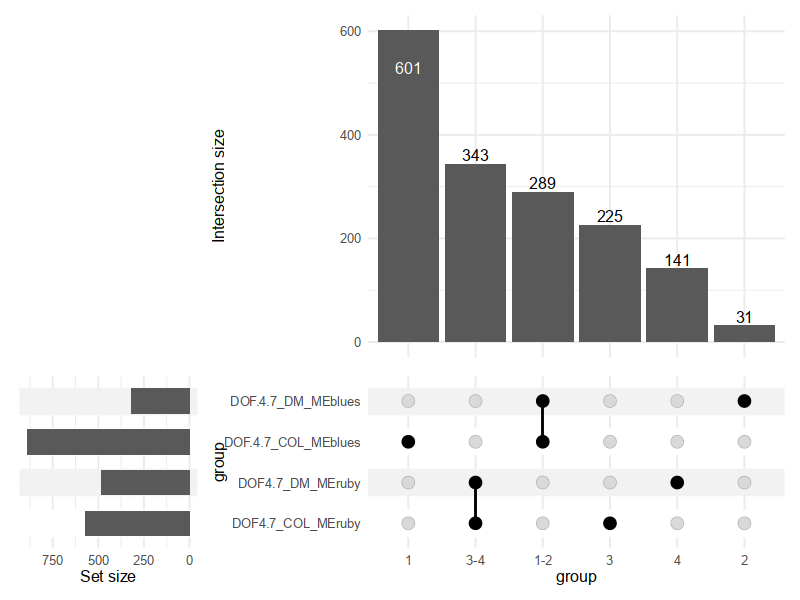

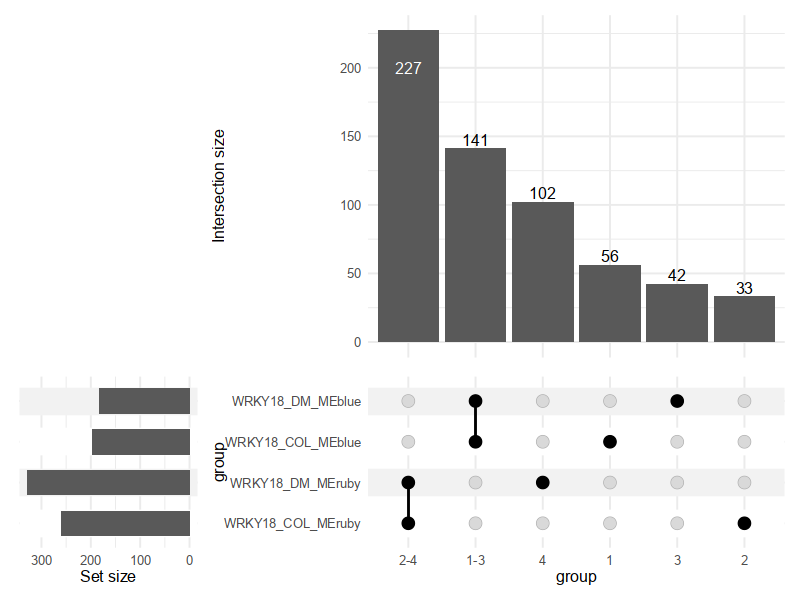

In [14]:
DOF4.7 <- create_matrix_and_plot(list(
    DOF4.7_COL_MEruby = data_list$DOF4.7_AT4G38000_COL_bound_in_MEruby, 
    DOF4.7_DM_MEruby = data_list$DOF4.7_AT4G38000_DM_bound_in_MEruby,
    DOF.4.7_COL_MEblues = data_list$DOF4.7_AT4G38000_COL_bound_in_MEblue %>% rbind(data_list$DOF4.7_AT4G38000_COL_bound_in_MEpurple), 
    DOF.4.7_DM_MEblues = data_list$DOF4.7_AT4G38000_DM_bound_in_MEblue %>% rbind(data_list$DOF4.7_AT4G38000_DM_bound_in_MEpurple)),
     'V3', uniqueness = TRUE, './plots/upset_plot_DOF4.7_blues.pdf')

WRKY18 <- create_matrix_and_plot(list(
    WRKY18_COL_MEruby = data_list$WRKY18_AT4G31800_COL_bound_in_MEruby,
    WRKY18_DM_MEruby = data_list$WRKY18_AT4G31800_DM_bound_in_MEruby,
    WRKY18_COL_MEblue = data_list$WRKY18_AT4G31800_COL_bound_in_MEblue %>% rbind(data_list$WRKY18_AT4G31800_COL_bound_in_MEpurple),
    WRKY18_DM_MEblue = data_list$WRKY18_AT4G31800_DM_bound_in_MEblue %>% rbind(data_list$WRKY18_AT4G31800_DM_bound_in_MEpurple)),
                       'V10', uniqueness = TRUE, './plots/upset_plot_WRKY18_blues.pdf')

In [52]:
DOF.4.7_COL_MEblues = data_list$DOF4.7_AT4G38000_COL_bound_in_MEblue %>% rbind(data_list$DOF4.7_AT4G38000_COL_bound_in_MEpurple)
DOF.4.7_COL_MEblues

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,159754,159782,DOF4.7_AT4G38000,11.85830,-,chr1,158904,161895,peak_61,.,.,AT1G01430,TBL25,0.64209
chr1,194982,195010,DOF4.7_AT4G38000,7.12406,+,chr1,194314,199789,peak_76,.,.,AT1G01540,AT1G01540,0.92766
chr1,195809,195837,DOF4.7_AT4G38000,10.92218,+,chr1,194314,199789,peak_76,.,.,AT1G01540,AT1G01540,0.73386
chr1,198513,198541,DOF4.7_AT4G38000,8.10426,+,chr1,194314,199789,peak_76,.,.,AT1G01540,AT1G01540,0.74092
chr1,227686,227714,DOF4.7_AT4G38000,7.78237,-,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.89504
chr1,228481,228509,DOF4.7_AT4G38000,11.43217,+,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.77279
chr1,228755,228783,DOF4.7_AT4G38000,8.68211,-,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.68140
chr1,395055,395083,DOF4.7_AT4G38000,7.08357,-,chr1,392117,395912,peak_149,.,.,AT1G02110,AT1G02110,0.65166
chr1,616659,616687,DOF4.7_AT4G38000,10.57539,-,chr1,615926,617344,peak_228,.,.,AT1G02800,CEL2,0.65025


In [53]:
DOF.4.7_DM_MEblues = data_list$DOF4.7_AT4G38000_DM_bound_in_MEblue %>% rbind(data_list$DOF4.7_AT4G38000_DM_bound_in_MEpurple)

In [55]:
DOF.4.7_COL_MEblues %>% anti_join(DOF.4.7_DM_MEblues, by = c('V1', 'V2', 'V3')) 

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,195809,195837,DOF4.7_AT4G38000,10.92218,+,chr1,194314,199789,peak_76,.,.,AT1G01540,AT1G01540,0.73386
chr1,227686,227714,DOF4.7_AT4G38000,7.78237,-,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.89504
chr1,228481,228509,DOF4.7_AT4G38000,11.43217,+,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.77279
chr1,228755,228783,DOF4.7_AT4G38000,8.68211,-,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.68140
chr1,395055,395083,DOF4.7_AT4G38000,7.08357,-,chr1,392117,395912,peak_149,.,.,AT1G02110,AT1G02110,0.65166
chr1,616659,616687,DOF4.7_AT4G38000,10.57539,-,chr1,615926,617344,peak_228,.,.,AT1G02800,CEL2,0.65025
chr1,898873,898901,DOF4.7_AT4G38000,10.70215,+,chr1,897372,900374,peak_337,.,.,AT1G03600,PSB27,0.60960
chr1,951812,951840,DOF4.7_AT4G38000,9.58271,-,chr1,951540,952378,peak_354,.,.,AT1G03780,TPX2,0.60737
chr1,1198002,1198030,DOF4.7_AT4G38000,7.12253,-,chr1,1197631,1198303,peak_443,.,.,AT1G04430,AT1G04430,0.72996


In [58]:
library(dplyr)
library(GenomicRanges)
library(rtracklayer)
library(Biostrings)
library(purrr)
# Assuming DOF.4.7_COL_MEblues is your initial dataframe
genes_of_interest <- DOF.4.7_COL_MEblues %>% 
  select(V1, V2, V3, V14) %>%
  distinct(V14)  # Extracting unique gene codes

# Load the GTF file and extract the CDS information
gtf_path <- "/media/HDD2/Genomes/Ath_Ensembl56/Arabidopsis_thaliana.TAIR10.56.gtf"
gtf_data <- import.gff(gtf_path, format = "gtf", feature.type = "CDS")

# Filter for the genes of interest
gtf_cds <- gtf_data[gtf_data$gene_id %in% genes_of_interest$V14]

# Compute the promoter regions (2kb upstream of the CDS start for + strand, 2kb downstream for - strand)
promoter_regions <- pmap(gtf_cds, function(seqnames, start, end, strand, width = 2000) {
  if (strand == "+") {
    GRanges(seqnames, IRanges(start - width, start - 1))
  } else {
    GRanges(seqnames, IRanges(end + 1, end + width))
  }
})

# Read the DNA fasta file
fasta_path <- "/media/HDD2/Genomes/Ath_Ensembl56/Arabidopsis_thaliana.TAIR10.dna.toplevel.fa"
genome <- readDNAStringSet(fasta_path)

# Extract the promoter sequences
promoter_sequences <- getSeq(genome, promoter_regions)

# Create a dataframe with gene identifiers and their promoter sequences
promoter_df <- data.frame(
  Gene = names(promoter_sequences),
  Sequence = as.character(promoter_sequences)
)

# Display the result
print(promoter_df)



Attaching package: ‘purrr’


The following object is masked from ‘package:XVector’:

    compact


The following object is masked from ‘package:GenomicRanges’:

    reduce


The following object is masked from ‘package:IRanges’:

    reduce


The following object is masked from ‘package:scales’:

    discard




ERROR: Error in getListElement(x, i, ...): GRanges objects don't support [[, as.list(), lapply(), or unlist() at
  the moment


In [110]:
library(dplyr)
library(GenomicRanges)
library(rtracklayer)
library(Biostrings)
library("BSgenome.Athaliana.TAIR.TAIR9")

# Assuming DOF.4.7_COL_MEblues is your initial dataframe
genes_of_interest <- DOF.4.7_COL_MEblues %>%
  dplyr::select(V14) %>%
  distinct()  # Extracting unique gene codes

# Load the GTF file and extract the CDS information
gtf_path <- "/media/HDD2/Genomes/Ath_Ensembl56/Arabidopsis_thaliana.TAIR10.56.gtf"
gtf_data <- import.gff(gtf_path, format = "gtf", feature.type = "start_codon")

# Filter for the genes of interest
gtf_cds <- gtf_data[gtf_data$gene_id %in% genes_of_interest$V14]

# Convert GRanges to a data frame for easier manipulation
gtf_df <- as.data.frame(gtf_cds) %>% filter( transcript_id %>% str_detect( '\\.1$') )
sample_n(gtf_df, 4)
nrow(gtf_df)
# Compute the promoter regions, each gene has its own promoter
promoter_regions <- gtf_df %>%
  mutate(start_promoter = ifelse(strand == "+", start - 1000, end + 1),
         end_promoter = ifelse(strand == "+", start - 1, end + 1000)) %>%
  dplyr::select(gene_id, seqnames, start_promoter, end_promoter, strand, start, end) %>%
    mutate(seqnames = paste0("Chr", seqnames ))

promoter_regions %>% str
promoter_regions %>% sample_n(4)


seqnames,start,end,width,strand,source,type,score,phase,gene_id,transcript_id,exon_number,gene_name,gene_source,gene_biotype,transcript_name,transcript_source,transcript_biotype,tag
<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,20668500,20668502,3,-,araport11,start_codon,NA,0,AT1G55360,AT1G55360.1,1,AT1G55360,araport11,protein_coding,AT1G55360-201,araport11,protein_coding,Ensembl_canonical
5,2182282,2182284,3,-,araport11,start_codon,NA,0,AT5G07020,AT5G07020.1,1,AT5G07020,araport11,protein_coding,AT5G07020-201,araport11,protein_coding,Ensembl_canonical
3,4403776,4403778,3,+,araport11,start_codon,NA,0,AT3G13510,AT3G13510.1,1,AT3G13510,araport11,protein_coding,AT3G13510-201,araport11,protein_coding,Ensembl_canonical
2,15052302,15052304,3,+,araport11,start_codon,NA,0,AT2G35830,AT2G35830.1,1,AT2G35830,araport11,protein_coding,AT2G35830-202,araport11,protein_coding,NA


[1] 267

'data.frame':	267 obs. of  7 variables:
 $ gene_id       : chr  "AT1G50020" "AT1G05870" "AT1G66180" "AT1G02110" ...
 $ seqnames      : chr  "Chr1" "Chr1" "Chr1" "Chr1" ...
 $ start_promoter: num  18521601 1773229 24646221 391939 10055666 ...
 $ end_promoter  : num  18522600 1774228 24647220 392938 10056665 ...
 $ strand        : Factor w/ 3 levels "+","-","*": 2 2 1 1 2 1 2 2 2 2 ...
 $ start         : int  18521598 1773226 24647221 392939 10055663 23132181 25833333 1307778 10505992 22316865 ...
 $ end           : int  18521600 1773228 24647223 392941 10055665 23132183 25833335 1307780 10505994 22316867 ...


gene_id,seqnames,start_promoter,end_promoter,strand,start,end
<chr>,<chr>,<dbl>,<dbl>,<fct>,<int>,<int>
AT1G50450,Chr1,18690349,18691348,-,18690346,18690348
AT3G28040,Chr3,10434139,10435138,+,10435139,10435141
AT1G65010,Chr1,24148543,24149542,+,24149543,24149545
AT3G23080,Chr3,8209182,8210181,-,8209179,8209181


In [111]:
library(dplyr)
library(GenomicRanges)
library(rtracklayer)
library(Biostrings)

# You already have the 'promoter_regions' calculated
# Convert to GRanges object for sequence extraction
promoter_granges <- GRanges(
  seqnames = promoter_regions$seqnames,
  ranges = IRanges(start = promoter_regions$start_promoter, end = promoter_regions$end_promoter),
  strand = promoter_regions$strand
)
# promoter_granges
# Read the DNA fasta file
# fasta_path <- "/media/HDD2/Genomes/Ath_Ensembl56/Arabidopsis_thaliana.TAIR10.dna.toplevel.fa"
# genome <- readDNAStringSet(fasta_path)

# Extract the promoter sequences
promoter_sequences <- getSeq(BSgenome.Athaliana.TAIR.TAIR9, promoter_granges)

# Convert to a character vector and add as a new column to the dataframe
promoter_regions$Sequence = as.character(promoter_sequences)




In [112]:
library(Biostrings)

# Convert the sequences in the dataframe to a DNAStringSet object
promoter_sequences_set <- DNAStringSet(promoter_regions$Sequence)

# Setting names after creating the DNAStringSet
names(promoter_sequences_set) <- paste(promoter_regions$gene_id, "promoter", sep="_")

# Specify the path to write the FASTA file
fasta_output_path <- "output_fasta/DOF_lost_bound_MEblues_promoters_1kb.fasta"

# Write the sequences to a FASTA file
writeXStringSet(promoter_sequences_set, filepath=fasta_output_path)

# Output message confirming the operation
cat("Promoter sequences written to:", fasta_output_path, "\n")


Promoter sequences written to: output_fasta/DOF_lost_bound_MEblues_promoters_1kb.fasta 


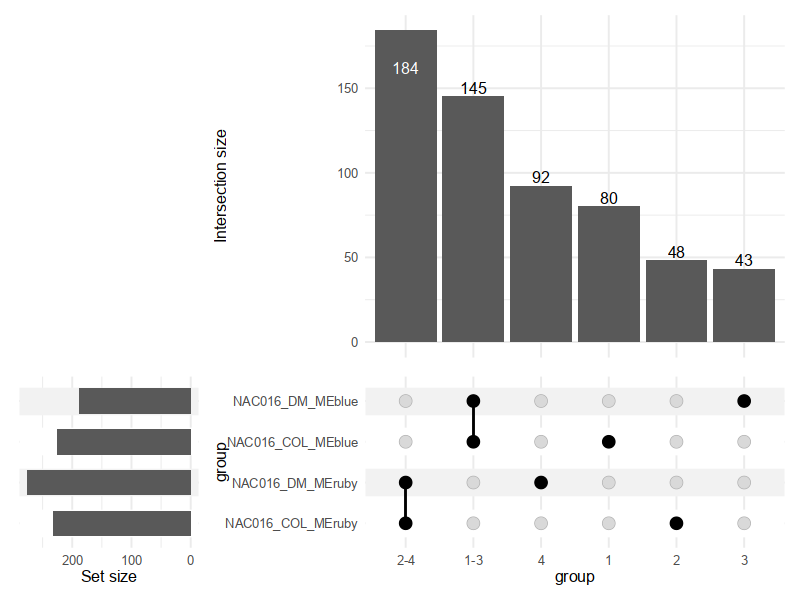

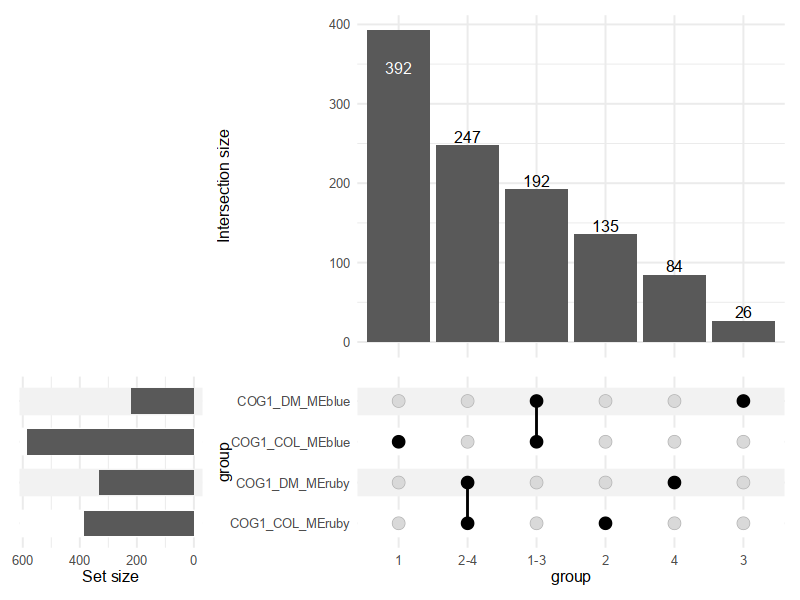

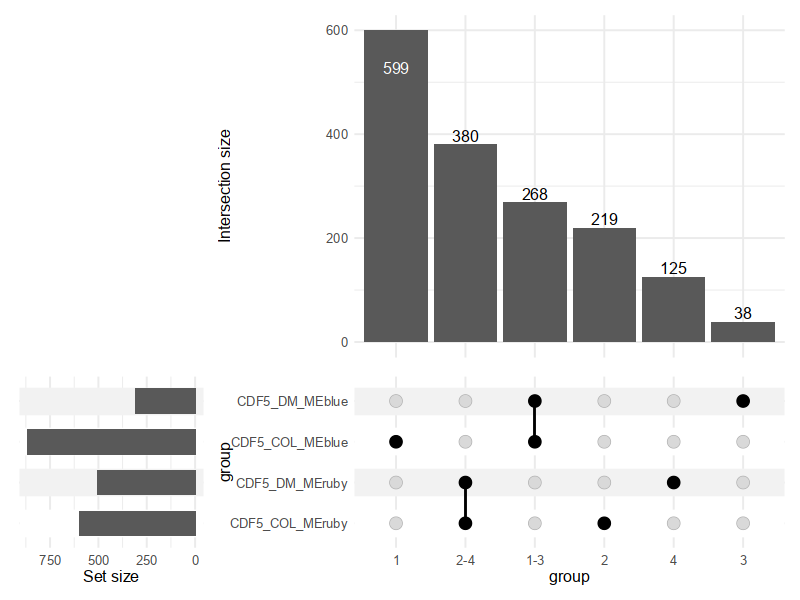

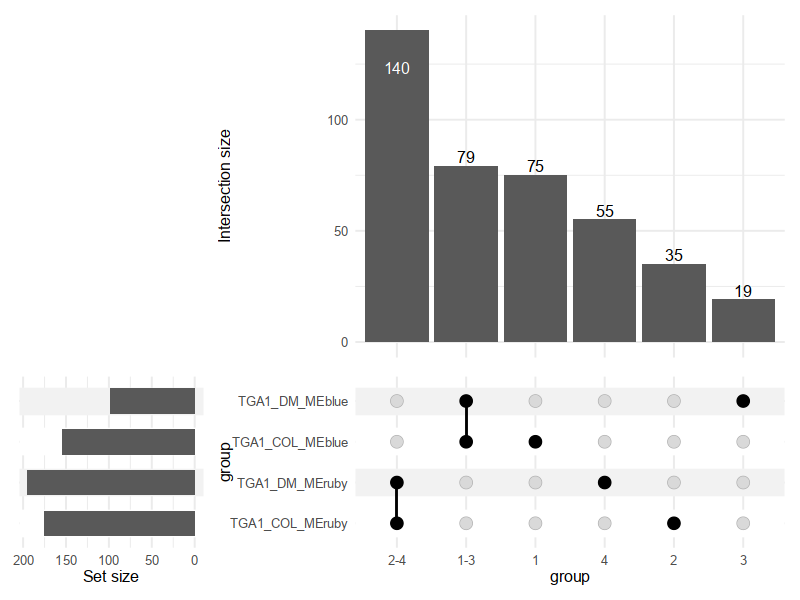

In [15]:

NAC016 <- create_matrix_and_plot(list(
    NAC016_COL_MEruby = data_list$NAC016_AT1G34180_COL_bound_in_MEruby,
    NAC016_DM_MEruby = data_list$NAC016_AT1G34180_DM_bound_in_MEruby,
    NAC016_COL_MEblue = data_list$NAC016_AT1G34180_COL_bound_in_MEblue %>% rbind(data_list$NAC016_AT1G34180_COL_bound_in_MEpurple),
    NAC016_DM_MEblue = data_list$NAC016_AT1G34180_DM_bound_in_MEblue %>% rbind(data_list$NAC016_AT1G34180_DM_bound_in_MEpurple)),
                       'V3', uniqueness = TRUE, './plots/upset_plot_NAC016_blues.pdf')
COG1 <- create_matrix_and_plot(list(
    COG1_COL_MEruby = data_list$COG1_AT1G29160_COL_bound_in_MEruby,
    COG1_DM_MEruby = data_list$COG1_AT1G29160_DM_bound_in_MEruby,
    COG1_COL_MEblue = data_list$COG1_AT1G29160_COL_bound_in_MEblue %>% rbind(data_list$COG1_AT1G29160_COL_bound_in_MEpurple),
    COG1_DM_MEblue = data_list$COG1_AT1G29160_DM_bound_in_MEblue %>% rbind(data_list$COG1_AT1G29160_DM_bound_in_MEpurple)),
                       'V3', uniqueness = TRUE, './plots/upset_plot_COG1_blues.pdf')

CDF5 <- create_matrix_and_plot(list(
    CDF5_COL_MEruby = data_list$CDF5_AT1G69570_COL_bound_in_MEruby,
    CDF5_DM_MEruby = data_list$CDF5_AT1G69570_DM_bound_in_MEruby,
    CDF5_COL_MEblue = data_list$CDF5_AT1G69570_COL_bound_in_MEblue %>% rbind(data_list$CDF5_AT1G69570_COL_bound_in_MEpurple),
    CDF5_DM_MEblue = data_list$CDF5_AT1G69570_DM_bound_in_MEblue %>% rbind(data_list$CDF5_AT1G69570_DM_bound_in_MEpurple)),
                       'V3', uniqueness = TRUE, './plots/upset_plot_CDF5_blues.pdf')

TGA1 <- create_matrix_and_plot(list(
    TGA1_COL_MEruby = data_list$TGA1_AT5G65210_COL_bound_in_MEruby,
    TGA1_DM_MEruby = data_list$TGA1_AT5G65210_DM_bound_in_MEruby,
    TGA1_COL_MEblue = data_list$TGA1_AT5G65210_COL_bound_in_MEblue %>% rbind(data_list$TGA1_AT5G65210_COL_bound_in_MEpurple),
    TGA1_DM_MEblue = data_list$TGA1_AT5G65210_DM_bound_in_MEblue %>% rbind(data_list$TGA1_AT5G65210_DM_bound_in_MEpurple)),
                       'V3', uniqueness = TRUE, './plots/upset_plot_TGA1_blues.pdf')



In [16]:
repressor_ruby_motif <- list(
    DOF4.7_COL_MEruby = data_list$DOF4.7_AT4G38000_COL_bound_in_MEruby,
    DOF4.7_DM_MEruby = data_list$DOF4.7_AT4G38000_DM_bound_in_MEruby,
    CDF5_COL_MEruby = data_list$CDF5_AT1G69570_COL_bound_in_MEruby,
    CDF5_DM_MEruby = data_list$CDF5_AT1G69570_DM_bound_in_MEruby,
    COG1_COL_MEruby = data_list$COG1_AT1G29160_COL_bound_in_MEruby,
    COG1_DM_MEruby = data_list$COG1_AT1G29160_DM_bound_in_MEruby)

repressor_blues_motif <- list(
    DOF4.7_COL_MEblues = data_list$DOF4.7_AT4G38000_COL_bound_in_MEblue %>% rbind(data_list$DOF4.7_AT4G38000_COL_bound_in_MEpurple),
    DOF4.7_DM_MEblues = data_list$DOF4.7_AT4G38000_DM_bound_in_MEblue %>% rbind(data_list$DOF4.7_AT4G38000_DM_bound_in_MEpurple),
    CDF5_COL_MEblues = data_list$CDF5_AT1G69570_COL_bound_in_MEblue %>% rbind(data_list$CDF5_AT1G69570_COL_bound_in_MEpurple),
    CDF5_DM_MEblues = data_list$CDF5_AT1G69570_DM_bound_in_MEblue %>% rbind(data_list$CDF5_AT1G69570_DM_bound_in_MEpurple),
    COG1_COL_MEblues = data_list$COG1_AT1G29160_COL_bound_in_MEblue %>% rbind(data_list$COG1_AT1G29160_COL_bound_in_MEpurple),
    COG1_DM_MEblues = data_list$COG1_AT1G29160_DM_bound_in_MEblue %>% rbind(data_list$COG1_AT1G29160_DM_bound_in_MEpurple))

In [17]:
data_list$DOF4.7_AT4G38000_COL_bound_in_MEblue %>% rbind(data_list$DOF4.7_AT4G38000_COL_bound_in_MEpurple) %>% rbind (CDF5_COL_MEblues = data_list$CDF5_AT1G69570_COL_bound_in_MEblue) %>% rbind(data_list$CDF5_AT1G69570_COL_bound_in_MEpurple) %>% rbind(COG1_COL_MEblues = data_list$COG1_AT1G29160_COL_bound_in_MEblue) %>% rbind(data_list$COG1_AT1G29160_COL_bound_in_MEpurple) %>% pull(V13) %>% unique %>% length

[1] 819

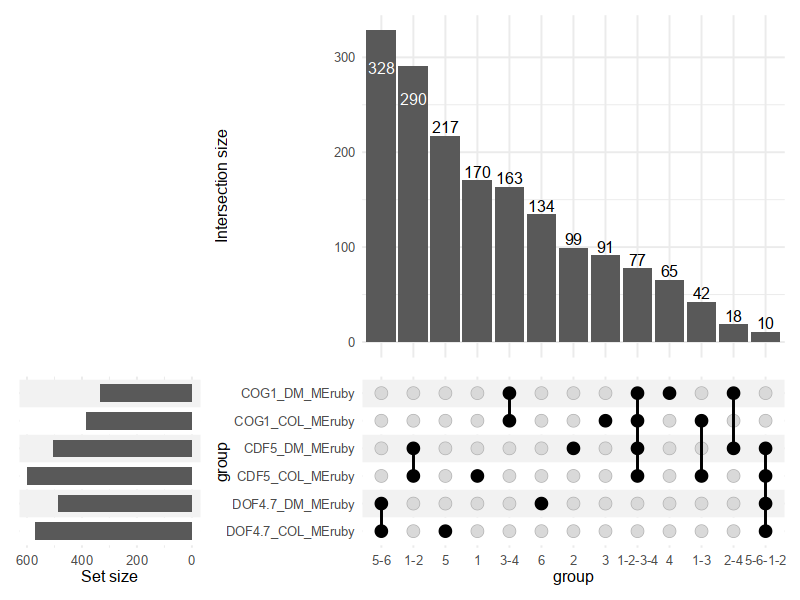

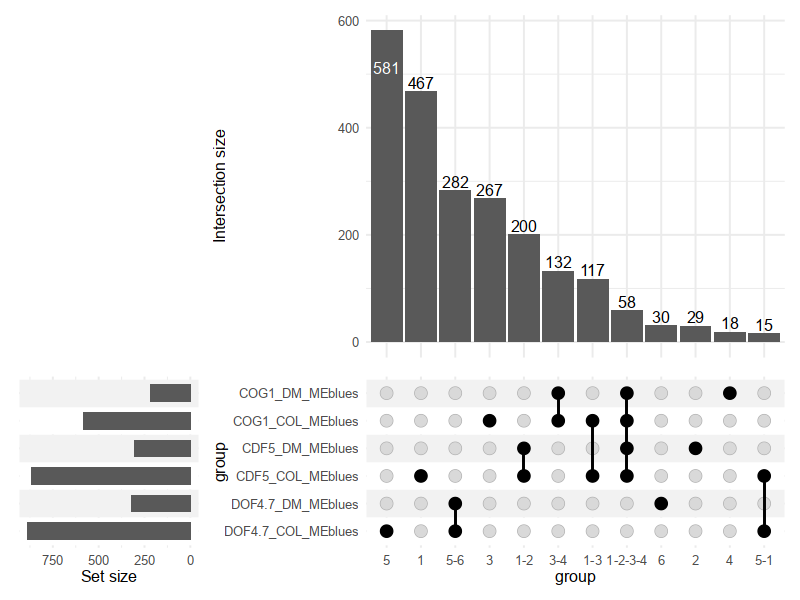

In [18]:
repressors_ruby <- create_matrix_and_plot( repressor_ruby_motif,
                       'V3', uniqueness = TRUE, './plots/upset_plot_repressors_ruby.pdf')

repressors_blues <- create_matrix_and_plot( repressor_blues_motif,
                       'V3', uniqueness = TRUE, './plots/upset_plot_repressors_blues.pdf')

In [19]:
library(VennDiagram)
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
plot_venn <- function (genes_list, main_title = '') {
    venn.diagram(genes_list, 
                          fill = c( "#A58AFF", '#D08555', '#4DAFFC'),
                  alpha = c(0.5, 0.5,0.5), cat.cex = 1, ## Vector giving the size for each category name
                  cex=1,filename=NULL,  cat.dist = 0.08, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Arial",
                              cat.fontfamily = "Arial",
                    main =  main_title,
                        main.pos = c(0.5, 1), main.fontface = "plain",
                    main.fontfamily = "Arial", main.col = "black",
                    main.cex = 1, fontfamily = 'Arial',
                  ggplot = T) 
}

Loading required package: grid

Loading required package: futile.logger



In [20]:
repressor_blues_motif$DOF4.7_COL_MEblues$V3

[1]   159782   195010   195837   198541   227714   228509   228783   395083
  [9]   616687   617035   898901   951840  1198030  1308680  1774053  2047939
 [17]  2972554  3156952  3480140  3518552  3639860  4000720  4087940  4091520
 [25]  4394722  4492566  4760337  4970474  4991259  5297889  5350963  5360600
 [33]  5789218  5789392  5858434  6334626  6334835  6506440  6579187  6683509
 [41]  6683556  6687165  6687349  6688491  6939379  6945500  6946810  6946995
 [49]  6965133  7089921  7782877  7886484  8155026  8556432  8937268  8938369
 [57]  9043820  9043923  9044026  9044101  9178903  9327150  9350155  9379313
 [65]  9455058  9456642  9740099 10053054 10053120 10056569 10149426 10326753
 [73] 10370054 10475924 10477662 10504843 10722281 11136394 11396382 11531796
 [81] 11531893 11966552 12055086 12059784 16127221 16127343 16848149 17062475
 [89] 17127377 17179345 17863724 17917854 17976436 18132595 18132687 18626370
 [97] 18626447 18690741 18691006 18691633 18802566 19226170 19300119 20097008
[105] 20424314 20448164 20670490 20803887 21133610 21717367 22097914 22097976
[113] 22319580 23131646 23134328 23402159 23915098 24026499 24043602 24060923
[121] 24136219 24139488 24149202 24149258 24387487 24648190 24677039 24677126
[129] 24973880 25047853 25050036 25050208 25386113 25393868 25395203 25732588
[137] 25834582 25949938 25950160 26093337 26141553 26144569 26213629 26213789
[145] 26216195 26434890 26470895 26512413 26512698 26518431 26704050 26800328
[153] 27152710 27401265 27402385 27452105 27664614 27664729 27667005 27667893
[161] 27759880 27777788 27777880 27779076 28239673 28239830 28419968 28430122
[169] 28467618 29387846 29413484 29590925 29743535 30129842 30217127 30311740
[177]   539990   787896   916988   917074  1676924  1824162  1824681  1862172
[185]  2199295  2763606  4312252  4312886  4313917  5050497  5053167  6950120
[193]  7050514  7052797  7054678  7055138  7126018  7300972  7522984  8941138
[201]  8942575  9073161  9084888  9090355  9131441  9140194  9140899  9141650
[209]  9404667  9436623  9579785  9635278  9720043  9784430  9785949  9789836
[217]  9948825 10043662 10329718 10329887 10444843 11173345 11214203 11214440
[225] 11306949 11391390 11478116 11480539 11481427 11727945 12073420 12083272
[233] 12083305 12173621 12228715 12230464 12330213 12415804 12432304 12433664
[241] 12591816 12591968 12808619 12885634 12965611 13865586 14125405 14303414
[249] 14331488 14331534 14384955 14386003 14436113 14547079 14578291 14629160
[257] 14629263 14629437 14852223 14909977 14913940 15059686 15333811 15333990
[265] 15474652 15540223 15634149 15634640 15684099 15721918 15788528 16573729
[273] 16641651 16643206 16885898 16886019 16909942 17379055 17509087 17510086
[281] 17510395 17526998 17585311 17739454 17740795 17777909 17809774 18010926
[289] 18417288 18523400 18627462 18691790 18706239 18785765 19191558 19191796
[297] 19392501 19622224   188247   188313   193457   194038   288514   562062
[305]   919145   919187   949449  1153547  1588841  1634915  1726740  1767682
[313]  1768573  1833203  2386139  2612110  2612256  2612378  2612417  2636843
[321]  2636980  2844111  3696635  3698103  3698752  4064814  4127688  4128087
[329]  4240486  4403160  4403467  4483932  4484328  4606978  4740198  4740518
[337]  4740745  4741342  4773319  4818071  4820771  5045519  5058841  5080215
[345]  5080881  5081973  5504798  5747858  5747968  5813014  5852006  6032336
[353]  6158584  6351204  6884320  6884441  7066700  7066832  7096366  7280430
[361]  7282443  7283043  7790333  7812691  7812962  8209272  8209472  8531256
[369]  8551888  8551982  8594673  8594827  8902854  9255029  9255289  9492622
[377]  9634662  9634787  9641027  9932093  9980541 10434026 10434062 10435059
[385] 10451521 10516691 10520313 11011517 11012142 11154085 11154302 15517639
[393] 15517668 16293292 16569032 16820024 16945273 17137930 17337545 17338275
[401] 17495408 17495443 17504189 17507967 18046309 18046478 18263361 18265066
[409] 18409733 18421377 

In [21]:
library(VennDiagram)
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
plot_venn <- function (genes_list, main_title = '') {
    venn.diagram(genes_list, 
                          fill = c( "#A58AFF", '#D08555', '#4DAFFC'),
                  alpha = c(0.5, 0.5,0.5), cat.cex = 1, ## Vector giving the size for each category name
                  cex=1,filename=NULL,  cat.dist = 0.08, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Arial",
                              cat.fontfamily = "Arial",
                    main =  main_title,
                        main.pos = c(0.5, 1), main.fontface = "plain",
                    main.fontfamily = "Arial", main.col = "black",
                    main.cex = 1, fontfamily = 'Arial',
                  ggplot = T) 
}

In [22]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

In [23]:
repressor_blues_motif$COG1_COL_MEblues %>% pull(V10) %>% unique %>% length

[1] 468

In [24]:
library(dplyr)

# Initialize empty data frames for each TF
CDF5_COL_common <- data.frame()
COG1_COL_common <- data.frame()
DOF4_7_COL_common <- data.frame()

# Function to find overlapping motifs
find_overlaps <- function(peak, df1, df2, df3) {
  rows_df1 <- df1 %>% filter(V10 == peak)
  rows_df2 <- df2 %>% filter(V10 == peak)
  rows_df3 <- df3 %>% filter(V10 == peak)
  
  for (i in 1:nrow(rows_df1)) {
    for (j in 1:nrow(rows_df2)) {
      for (k in 1:nrow(rows_df3)) {
        if (rows_df1$V1[i] == rows_df2$V1[j] && rows_df1$V1[i] == rows_df3$V1[k] &&
            (max(rows_df1$V3[i], rows_df2$V3[j], rows_df3$V3[k]) - 
             min(rows_df1$V2[i], rows_df2$V2[j], rows_df3$V2[k])) < 50) {
          CDF5_COL_common <<- rbind(CDF5_COL_common, rows_df1[i, ])
          COG1_COL_common <<- rbind(COG1_COL_common, rows_df2[j, ])
          DOF4_7_COL_common <<- rbind(DOF4_7_COL_common, rows_df3[k, ])
        }
      }
    }
  }
}

# Get the unique peaks across all three data frames
unique_peaks_CDF5 <- unique(repressor_blues_motif$CDF5_COL_MEblues$V10)
unique_peaks_COG1 <- unique(repressor_blues_motif$COG1_COL_MEblues$V10)
unique_peaks_DOF4_7 <- unique(repressor_blues_motif$DOF4.7_COL_MEblues$V10)
common_peaks <- Reduce(intersect, list(unique_peaks_CDF5, unique_peaks_COG1, unique_peaks_DOF4_7))

# Apply the function to each common peak
for (peak in common_peaks) {
  find_overlaps(peak, 
                repressor_blues_motif$CDF5_COL_MEblues, 
                repressor_blues_motif$COG1_COL_MEblues, 
                repressor_blues_motif$DOF4.7_COL_MEblues)
}
CDF5_COL_common %>% nrow

[1] 244

In [25]:
repressor_blues_motif$CDF5_COL_MEblues %>% nrow
repressor_blues_motif$CDF5_MEblues_lost <- repressor_blues_motif$CDF5_COL_MEblues %>% anti_join(repressor_blues_motif$CDF5_DM_MEblues, by = c('V1', 'V2', 'V3'))
repressor_blues_motif$DOF4.7_MEblues_lost <- repressor_blues_motif$DOF4.7_COL_MEblues %>% anti_join(repressor_blues_motif$DOF4.7_DM_MEblues, by = c('V1', 'V2', 'V3'))
repressor_blues_motif$COG1_MEblues_lost <- repressor_blues_motif$COG1_COL_MEblues %>% anti_join(repressor_blues_motif$COG1_DM_MEblues, by = c('V1', 'V2', 'V3'))
repressor_blues_motif$COG1_MEblues_lost %>% nrow

[1] 867

[1] 392

In [26]:
library(dplyr)

# Initialize empty data frames for each TF's lost motifs
CDF5_MEblues_lost_common <- data.frame()
COG1_MEblues_lost_common <- data.frame()
DOF4.7_MEblues_lost_common <- data.frame()

# Function to find overlapping motifs among lost motifs
find_overlaps_lost <- function(peak, df1, df2, df3) {
  rows_df1 <- df1 %>% filter(V10 == peak)
  rows_df2 <- df2 %>% filter(V10 == peak)
  rows_df3 <- df3 %>% filter(V10 == peak)
  
  for (i in 1:nrow(rows_df1)) {
    for (j in 1:nrow(rows_df2)) {
      for (k in 1:nrow(rows_df3)) {
        if (rows_df1$V1[i] == rows_df2$V1[j] && rows_df1$V1[i] == rows_df3$V1[k] &&
            (max(rows_df1$V3[i], rows_df2$V3[j], rows_df3$V3[k]) - 
             min(rows_df1$V2[i], rows_df2$V2[j], rows_df3$V2[k])) < 50) {
          CDF5_MEblues_lost_common <<- rbind(CDF5_MEblues_lost_common, rows_df1[i, ])
          COG1_MEblues_lost_common <<- rbind(COG1_MEblues_lost_common, rows_df2[j, ])
          DOF4.7_MEblues_lost_common <<- rbind(DOF4.7_MEblues_lost_common, rows_df3[k, ])
        }
      }
    }
  }
}

# Get the unique peaks across all three lost motifs data frames
unique_peaks_CDF5_lost <- unique(repressor_blues_motif$CDF5_MEblues_lost$V10)
unique_peaks_COG1_lost <- unique(repressor_blues_motif$COG1_MEblues_lost$V10)
unique_peaks_DOF4.7_lost <- unique(repressor_blues_motif$DOF4.7_MEblues_lost$V10)
common_peaks_lost <- Reduce(intersect, list(unique_peaks_CDF5_lost, unique_peaks_COG1_lost, unique_peaks_DOF4.7_lost))

# Apply the function to each common peak among the lost motifs
for (peak in common_peaks_lost) {
  find_overlaps_lost(peak, 
                     repressor_blues_motif$CDF5_MEblues_lost, 
                     repressor_blues_motif$COG1_MEblues_lost, 
                     repressor_blues_motif$DOF4.7_MEblues_lost)
}


In [27]:
CDF5_MEblues_lost_common

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,chr1,4091485,4091512,CDF5_AT1G69570,10.77538,-,chr1,4089965,4092827,peak_1448,.,.,AT1G12090,ELP,0.70417
2,chr1,9043994,9044021,CDF5_AT1G69570,8.79494,-,chr1,9043579,9044499,peak_3077,.,.,AT1G26150,PERK10,0.92942
21,chr1,9044067,9044094,CDF5_AT1G69570,11.01954,+,chr1,9043579,9044499,peak_3077,.,.,AT1G26150,PERK10,0.74896
11,chr1,9178861,9178888,CDF5_AT1G69570,9.22210,-,chr1,9178232,9181682,peak_3114,.,.,AT1G26560,BGLU40,0.67855
12,chr1,9350113,9350140,CDF5_AT1G69570,10.17328,-,chr1,9349580,9350676,peak_3168,.,.,AT1G26945,KDR,0.65880
13,chr1,10370036,10370063,CDF5_AT1G69570,12.52433,+,chr1,10369839,10370284,peak_3476,.,.,AT1G29660,AT1G29660,0.60970
14,chr1,10477624,10477651,CDF5_AT1G69570,10.54820,-,chr1,10475273,10483278,peak_3509,.,.,AT1G29930,CAB1,0.81981
15,chr1,17917832,17917859,CDF5_AT1G69570,9.54088,+,chr1,17914785,17918379,peak_5466,.,.,AT1G48480,RKL1,0.63505
16,chr1,18626333,18626360,CDF5_AT1G69570,7.62471,+,chr1,18625852,18626542,peak_5690,.,.,AT1G50280,AT1G50280,0.74370


In [28]:
DOF4.7_MEblues_lost_common

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,chr1,4091492,4091520,DOF4.7_AT4G38000,11.96206,-,chr1,4089965,4092827,peak_1448,.,.,AT1G12090,ELP,0.70417
2,chr1,9043998,9044026,DOF4.7_AT4G38000,7.65955,-,chr1,9043579,9044499,peak_3077,.,.,AT1G26150,PERK10,0.92942
3,chr1,9044073,9044101,DOF4.7_AT4G38000,11.15203,+,chr1,9043579,9044499,peak_3077,.,.,AT1G26150,PERK10,0.65891
4,chr1,9178875,9178903,DOF4.7_AT4G38000,10.19344,-,chr1,9178232,9181682,peak_3114,.,.,AT1G26560,BGLU40,0.67855
5,chr1,9350127,9350155,DOF4.7_AT4G38000,10.92512,-,chr1,9349580,9350676,peak_3168,.,.,AT1G26945,KDR,0.68756
6,chr1,10370026,10370054,DOF4.7_AT4G38000,7.15662,+,chr1,10369839,10370284,peak_3476,.,.,AT1G29660,AT1G29660,0.60111
21,chr1,10477634,10477662,DOF4.7_AT4G38000,8.22690,-,chr1,10475273,10483278,peak_3509,.,.,AT1G29930,CAB1,0.81981
11,chr1,17917826,17917854,DOF4.7_AT4G38000,9.17204,+,chr1,17914785,17918379,peak_5466,.,.,AT1G48480,RKL1,0.63505
12,chr1,18626342,18626370,DOF4.7_AT4G38000,7.85057,+,chr1,18625852,18626542,peak_5690,.,.,AT1G50280,AT1G50280,0.81748


In [29]:
repressor_blues_motif$CDF5_MEblues_lost

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,227678,227705,CDF5_AT1G69570,7.56520,-,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.63878
chr1,418318,418345,CDF5_AT1G69570,9.70734,+,chr1,418161,422482,peak_155,.,.,AT1G02205,CER1,0.72589
chr1,616655,616682,CDF5_AT1G69570,8.76497,-,chr1,615926,617344,peak_228,.,.,AT1G02800,CEL2,0.65025
chr1,1129504,1129531,CDF5_AT1G69570,7.21264,-,chr1,1128562,1130736,peak_418,.,.,AT1G04240,SHY2,0.60737
chr1,1198005,1198032,CDF5_AT1G69570,8.82053,-,chr1,1197631,1198303,peak_443,.,.,AT1G04430,AT1G04430,0.72996
chr1,1307925,1307952,CDF5_AT1G69570,8.45638,-,chr1,1304088,1309605,peak_485,.,.,AT1G04680,AT1G04680,0.65363
chr1,1774040,1774067,CDF5_AT1G69570,7.79983,+,chr1,1773197,1775492,peak_645,.,.,AT1G05870,AT1G05870,0.87712
chr1,1942730,1942757,CDF5_AT1G69570,11.88334,-,chr1,1939511,1945352,peak_700,.,.,AT1G06360,AT1G06360,0.65589
chr1,2047905,2047932,CDF5_AT1G69570,9.61392,-,chr1,2045033,2048559,peak_736,.,.,AT1G06680,PSBP-1,0.71167


In [30]:
repressor_blues_motif$COG1_MEblues_lost

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,418318,418339,COG1_AT1G29160,10.66310,-,chr1,418161,422482,peak_155,.,.,AT1G02205,CER1,0.72589
chr1,1129501,1129522,COG1_AT1G29160,8.00225,+,chr1,1128562,1130736,peak_418,.,.,AT1G04240,SHY2,0.62253
chr1,1774040,1774061,COG1_AT1G29160,8.29205,-,chr1,1773197,1775492,peak_645,.,.,AT1G05870,AT1G05870,0.88319
chr1,1942736,1942757,COG1_AT1G29160,8.92123,+,chr1,1939511,1945352,peak_700,.,.,AT1G06360,AT1G06360,0.65589
chr1,3157352,3157373,COG1_AT1G29160,8.71285,+,chr1,3154330,3159063,peak_1123,.,.,AT1G09750,AT1G09750,1.12298
chr1,3478814,3478835,COG1_AT1G29160,8.73701,-,chr1,3478623,3481655,peak_1232,.,.,AT1G10550,XTH33,0.61216
chr1,3639602,3639623,COG1_AT1G29160,7.44621,-,chr1,3637517,3641501,peak_1290,.,.,AT1G10910,EMB3103,0.69961
chr1,4091491,4091512,COG1_AT1G29160,11.25632,+,chr1,4089965,4092827,peak_1448,.,.,AT1G12090,ELP,0.70417
chr1,4394689,4394710,COG1_AT1G29160,7.99794,-,chr1,4391096,4396056,peak_1553,.,.,AT1G12900,GAPA-2,0.66925


In [31]:
find_shared_peaks <- function(df1, df2) {
  # Creating two empty data frames with the same structure as input data frames
  shared_peaks_df1 <- df1[FALSE,]
  shared_peaks_df2 <- df2[FALSE,]

  # Finding unique peaks
  unique_peaks <- intersect(df1$V10, df2$V10)

  # Iterating over unique peaks
  for (peak in unique_peaks) {
    subset_df1 <- subset(df1, V10 == peak)
    subset_df2 <- subset(df2, V10 == peak)

    # Iterating over rows with the same V10 in both data frames
    for (row1 in 1:nrow(subset_df1)) {
      for (row2 in 1:nrow(subset_df2)) {
        # Checking if V1 is the same and if the motifs overlap
        if (subset_df1[row1, 'V1'] == subset_df2[row2, 'V1'] && 
            max(subset_df1[row1, 'V3'], subset_df2[row2, 'V3']) - min(subset_df1[row1, 'V2'], subset_df2[row2, 'V2']) < 50) {
          # Adding rows to the respective data frames
          shared_peaks_df1 <- rbind(shared_peaks_df1, subset_df1[row1, ])
          shared_peaks_df2 <- rbind(shared_peaks_df2, subset_df2[row2, ])
        }
      }
    }
  }

  # Returning the two data frames with shared peaks
  return(list(shared_peaks_df1, shared_peaks_df2))
}

CDF5_DOF4_7_shared <- find_shared_peaks(repressor_blues_motif$CDF5_MEblues_lost, repressor_blues_motif$DOF4.7_MEblues_lost)
DOF4_7_COG1_shared <- find_shared_peaks(repressor_blues_motif$DOF4.7_MEblues_lost, repressor_blues_motif$COG1_MEblues_lost)
COG1_CDF5_shared <- find_shared_peaks(repressor_blues_motif$COG1_MEblues_lost, repressor_blues_motif$CDF5_MEblues_lost)


In [32]:
DOF4_7_COG1_shared[[1]] %>% anti_join(DOF4.7_MEblues_lost_common, by = c('V1', 'V2', 'V3'))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
17,chr1,4394694,4394722,DOF4.7_AT4G38000,8.90358,+,chr1,4391096,4396056,peak_1553,.,.,AT1G12900,GAPA-2,0.66925
56,chr1,12059756,12059784,DOF4.7_AT4G38000,8.04127,+,chr1,12054163,12060005,peak_3992,.,.,AT1G33240,GTL1,0.64134
138,chr2,9131413,9131441,DOF4.7_AT4G38000,10.56811,-,chr2,9127013,9131478,peak_12232,.,.,AT2G21330,FBA1,0.70016
174,chr2,14384927,14384955,DOF4.7_AT4G38000,7.25810,+,chr2,14384239,14386586,peak_13942,.,.,AT2G34060,AT2G34060,0.76045
178,chr2,14852195,14852223,DOF4.7_AT4G38000,8.07496,-,chr2,14848620,14852371,peak_14090,.,.,AT2G35260,AT2G35260,0.63497
187,chr2,15684071,15684099,DOF4.7_AT4G38000,10.33288,-,chr2,15684012,15685553,peak_14353,.,.,AT2G37380,MAKR3,0.61212
205,chr2,18785737,18785765,DOF4.7_AT4G38000,7.57822,-,chr2,18784873,18786977,peak_15464,.,.,AT2G45590,AT2G45590,0.73980
218,chr3,1634887,1634915,DOF4.7_AT4G38000,8.67098,-,chr3,1630954,1635388,peak_16359,.,.,AT3G05625,AT3G05625,0.67425
259,chr3,8551954,8551982,DOF4.7_AT4G38000,7.49208,-,chr3,8550230,8554016,peak_18708,.,.,AT3G23730,XTH16,0.84994


In [33]:
DOF4_7_COG1_shared[[2]]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
8,chr1,4091491,4091512,COG1_AT1G29160,11.25632,+,chr1,4089965,4092827,peak_1448,.,.,AT1G12090,ELP,0.70417
9,chr1,4394689,4394710,COG1_AT1G29160,7.99794,-,chr1,4391096,4396056,peak_1553,.,.,AT1G12900,GAPA-2,0.66925
20,chr1,9044000,9044021,COG1_AT1G29160,9.55808,+,chr1,9043579,9044499,peak_3077,.,.,AT1G26150,PERK10,0.92942
21,chr1,9044067,9044088,COG1_AT1G29160,8.76444,-,chr1,9043579,9044499,peak_3077,.,.,AT1G26150,PERK10,0.74896
22,chr1,9178867,9178888,COG1_AT1G29160,8.05079,+,chr1,9178232,9181682,peak_3114,.,.,AT1G26560,BGLU40,0.67855
24,chr1,9350139,9350160,COG1_AT1G29160,8.65335,+,chr1,9349580,9350676,peak_3168,.,.,AT1G26945,KDR,0.69511
29,chr1,10370036,10370057,COG1_AT1G29160,9.93775,-,chr1,10369839,10370284,peak_3476,.,.,AT1G29660,AT1G29660,0.60879
30,chr1,10477630,10477651,COG1_AT1G29160,7.54626,+,chr1,10475273,10483278,peak_3509,.,.,AT1G29930,CAB1,0.81981
32,chr1,12059763,12059784,COG1_AT1G29160,10.22431,-,chr1,12054163,12060005,peak_3992,.,.,AT1G33240,GTL1,0.62698


In [34]:
COG1_CDF5_shared[[1]] %>% anti_join(COG1_MEblues_lost_common, by = c('V1', 'V2', 'V3'))

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,418318,418339,COG1_AT1G29160,10.66310,-,chr1,418161,422482,peak_155,.,.,AT1G02205,CER1,0.72589
chr1,1129501,1129522,COG1_AT1G29160,8.00225,+,chr1,1128562,1130736,peak_418,.,.,AT1G04240,SHY2,0.62253
chr1,1774040,1774061,COG1_AT1G29160,8.29205,-,chr1,1773197,1775492,peak_645,.,.,AT1G05870,AT1G05870,0.88319
chr1,1942736,1942757,COG1_AT1G29160,8.92123,+,chr1,1939511,1945352,peak_700,.,.,AT1G06360,AT1G06360,0.65589
chr1,3157352,3157373,COG1_AT1G29160,8.71285,+,chr1,3154330,3159063,peak_1123,.,.,AT1G09750,AT1G09750,1.12298
chr1,3478814,3478835,COG1_AT1G29160,8.73701,-,chr1,3478623,3481655,peak_1232,.,.,AT1G10550,XTH33,0.61216
chr1,4735382,4735403,COG1_AT1G29160,9.73808,-,chr1,4734608,4736237,peak_1669,.,.,AT1G13820,AT1G13820,0.65308
chr1,4970573,4970594,COG1_AT1G29160,7.52791,+,chr1,4970176,4972717,peak_1752,.,.,AT1G14520,MIOX1,0.84620
chr1,5298856,5298877,COG1_AT1G29160,7.51139,+,chr1,5297577,5299020,peak_1872,.,.,AT1G15410,AT1G15410,0.64232


In [35]:
CDF5_DOF4_7_shared[[1]] %>% anti_join(CDF5_MEblues_lost_common, by = c('V1', 'V2', 'V3'))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,chr1,227678,227705,CDF5_AT1G69570,7.56520,-,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.63878
3,chr1,616655,616682,CDF5_AT1G69570,8.76497,-,chr1,615926,617344,peak_228,.,.,AT1G02800,CEL2,0.65025
5,chr1,1198005,1198032,CDF5_AT1G69570,8.82053,-,chr1,1197631,1198303,peak_443,.,.,AT1G04430,AT1G04430,0.72996
9,chr1,2047905,2047932,CDF5_AT1G69570,9.61392,-,chr1,2045033,2048559,peak_736,.,.,AT1G06680,PSBP-1,0.71167
13,chr1,4000693,4000720,CDF5_AT1G69570,7.03533,-,chr1,4000569,4001399,peak_1409,.,.,AT1G11860,AT1G11860,0.70575
18,chr1,4991239,4991266,CDF5_AT1G69570,8.78193,-,chr1,4990538,4992439,peak_1758,.,.,AT1G14580,AT1G14580,0.64952
20,chr1,5350921,5350948,CDF5_AT1G69570,8.37027,-,chr1,5349584,5350992,peak_1890,.,.,AT1G15550,GA3OX1,0.62573
21,chr1,6334791,6334818,CDF5_AT1G69570,9.79394,+,chr1,6334341,6336188,peak_2218,.,.,AT1G18400,BEE1,0.63907
24,chr1,6687326,6687353,CDF5_AT1G69570,7.37551,-,chr1,6685729,6688751,peak_2331,.,.,AT1G19350,BES1,0.81044


In [36]:
repressor_blues_motif$CDF5_MEblues_lost %>% anti_join(CDF5_DOF4_7_shared[[1]], by = c('V1', 'V2', 'V3')) %>% 
    anti_join(COG1_CDF5_shared[[2]], by = c('V1', 'V2', 'V3')) 

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,1307925,1307952,CDF5_AT1G69570,8.45638,-,chr1,1304088,1309605,peak_485,.,.,AT1G04680,AT1G04680,0.65363
chr1,3397923,3397950,CDF5_AT1G69570,8.78327,-,chr1,3395784,3399063,peak_1200,.,.,AT1G10360,GSTU18,0.61807
chr1,4906792,4906819,CDF5_AT1G69570,7.92670,+,chr1,4906454,4907558,peak_1727,.,.,AT1G14350,FLP,0.70860
chr1,6684535,6684562,CDF5_AT1G69570,9.37947,+,chr1,6683262,6685041,peak_2330,.,.,AT1G19340,AT1G19340,0.59703
chr1,6939412,6939439,CDF5_AT1G69570,8.16586,-,chr1,6938102,6942756,peak_2424,.,.,AT1G20010,TUB5,0.86256
chr1,6939804,6939831,CDF5_AT1G69570,10.77494,-,chr1,6938102,6942756,peak_2424,.,.,AT1G20010,TUB5,0.61605
chr1,6940637,6940664,CDF5_AT1G69570,8.20253,+,chr1,6938102,6942756,peak_2424,.,.,AT1G20010,TUB5,0.64746
chr1,7888947,7888974,CDF5_AT1G69570,7.41395,+,chr1,7887470,7889229,peak_2727,.,.,AT1G22330,AT1G22330,1.35977
chr1,8156043,8156070,CDF5_AT1G69570,8.20454,+,chr1,8154620,8156847,peak_2825,.,.,AT1G23030,AT1G23030,0.63219


In [37]:
repressor_blues_motif$COG1_MEblues_lost %>% anti_join(COG1_CDF5_shared[[1]], by = c('V1', 'V2', 'V3')) %>% 
    anti_join(DOF4_7_COG1_shared[[2]], by = c('V1', 'V2', 'V3'))

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,3639602,3639623,COG1_AT1G29160,7.44621,-,chr1,3637517,3641501,peak_1290,.,.,AT1G10910,EMB3103,0.69961
chr1,6333589,6333610,COG1_AT1G29160,11.31402,-,chr1,6333176,6333751,peak_2217,.,.,AT1G18400,BEE1,0.63689
chr1,6687038,6687059,COG1_AT1G29160,9.94679,-,chr1,6685729,6688751,peak_2331,.,.,AT1G19350,BES1,0.60006
chr1,6687173,6687194,COG1_AT1G29160,7.81556,+,chr1,6685729,6688751,peak_2331,.,.,AT1G19350,BES1,0.69026
chr1,9326484,9326505,COG1_AT1G29160,7.83187,+,chr1,9324952,9329634,peak_3160,.,.,AT1G26920,AT1G26920,0.87636
chr1,9534473,9534494,COG1_AT1G29160,8.43658,+,chr1,9534149,9534556,peak_3222,.,.,AT1G27460,NPGR1,0.61495
chr1,9544288,9544309,COG1_AT1G29160,8.87135,-,chr1,9544060,9547042,peak_3225,.,.,AT1G27480,AT1G27480,0.76232
chr1,9762233,9762254,COG1_AT1G29160,9.11583,+,chr1,9760881,9764798,peak_3284,.,.,AT1G28010,ABCB14,0.60559
chr1,10326787,10326808,COG1_AT1G29160,8.47474,-,chr1,10323755,10329476,peak_3462,.,.,AT1G29530,AT1G29530,0.71606


In [38]:
repressor_blues_motif$DOF4.7_MEblues_lost %>% anti_join(DOF4_7_COG1_shared[[1]], by = c('V1', 'V2', 'V3')) %>% 
    anti_join(CDF5_DOF4_7_shared[[2]], by = c('V1', 'V2', 'V3'))

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,195809,195837,DOF4.7_AT4G38000,10.92218,+,chr1,194314,199789,peak_76,.,.,AT1G01540,AT1G01540,0.73386
chr1,228481,228509,DOF4.7_AT4G38000,11.43217,+,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.77279
chr1,228755,228783,DOF4.7_AT4G38000,8.68211,-,chr1,224761,229667,peak_88,.,.,AT1G01620,PIP1C,0.68140
chr1,395055,395083,DOF4.7_AT4G38000,7.08357,-,chr1,392117,395912,peak_149,.,.,AT1G02110,AT1G02110,0.65166
chr1,898873,898901,DOF4.7_AT4G38000,10.70215,+,chr1,897372,900374,peak_337,.,.,AT1G03600,PSB27,0.60960
chr1,951812,951840,DOF4.7_AT4G38000,9.58271,-,chr1,951540,952378,peak_354,.,.,AT1G03780,TPX2,0.60737
chr1,3156924,3156952,DOF4.7_AT4G38000,8.15735,-,chr1,3154330,3159063,peak_1123,.,.,AT1G09750,AT1G09750,0.75281
chr1,3518524,3518552,DOF4.7_AT4G38000,8.40854,+,chr1,3518174,3519154,peak_1246,.,.,AT1G10640,AT1G10640,1.03208
chr1,3639832,3639860,DOF4.7_AT4G38000,7.06654,-,chr1,3637517,3641501,peak_1290,.,.,AT1G10910,EMB3103,0.70414


In [39]:
lost_target_genes <- repressor_blues_motif$CDF5_MEblues_lost %>% rbind(repressor_blues_motif$DOF4.7_MEblues_lost) %>% 
    rbind(repressor_blues_motif$COG1_MEblues_lost) %>% pull(V13) %>% unique 

In [40]:
# Function to find shared motifs between two TFs
find_shared_motifs <- function(df1, df2) {
  shared_motifs <- do.call(rbind, lapply(1:nrow(df1), function(i) {
    row1 <- df1[i, ]
    overlaps <- df2 %>%
      filter(V1 == row1$V1, 
             (max(row1$V3, V3) - min(row1$V2, V2)) < 50)
    if (nrow(overlaps) > 0) {
      return(row1)
    }
  }))
  return(shared_motifs)
}


CDF5_DOF4_7_common <- find_shared_motifs(repressor_blues_motif$CDF5_MEblues_lost, repressor_blues_motif$DOF4.7_MEblues_lost)


In [41]:
CDF5_DOF4_7_common

NULL

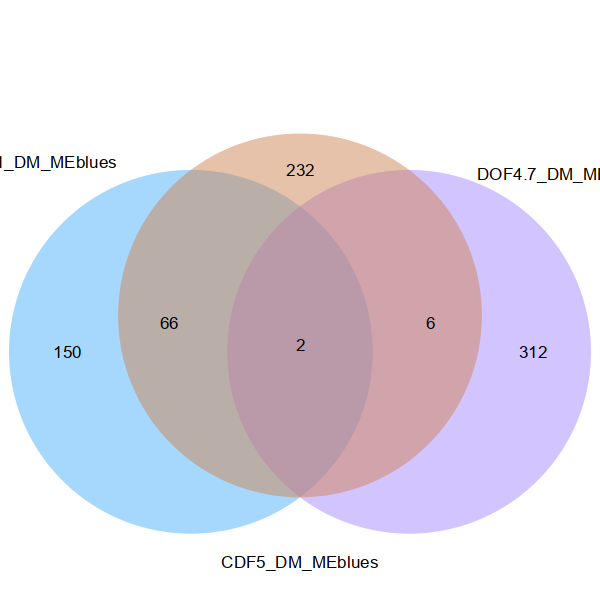

In [42]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)

venn_plot <- plot_venn(list(
    'DOF4.7_DM_MEblues' = repressor_blues_motif$DOF4.7_DM_MEblues$V3,
    'CDF5_DM_MEblues' = repressor_blues_motif$CDF5_DM_MEblues$V3,
    'COG1_DM_MEblues' = repressor_blues_motif$COG1_DM_MEblues$V3),
                                    '')
grid.newpage()
grid.draw(venn_plot)

In [43]:

pdf(file="./plots/repressor_ruby_motif_DM_venn.pdf", width = 2.7, height = 2.7)
grid.newpage()
grid.draw(venn_plot)
dev.off()

png 
  2

In [44]:
repressors_blues$binary_matrix

,DOF4.7_COL_MEblues,DOF4.7_DM_MEblues,CDF5_COL_MEblues,CDF5_DM_MEblues,COG1_COL_MEblues,COG1_DM_MEblues
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
159782,1,1,0,0,0,0
195010,1,1,0,0,0,0
195837,1,0,0,0,0,0
198541,1,1,0,0,0,0
227714,1,0,0,0,0,0
228509,1,0,0,0,0,0
228783,1,0,0,0,0,0
395083,1,0,0,0,0,0
616687,1,0,0,0,0,0


,DOF4.7_COL_MEblues,DOF4.7_DM_MEblues,CDF5_COL_MEblues,CDF5_DM_MEblues,COG1_COL_MEblues,COG1_DM_MEblues
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
159782,1,1,0,0,0,0
195010,1,1,0,0,0,0
195837,1,0,0,0,0,0
198541,1,1,0,0,0,0
227714,1,0,0,0,0,0
228509,1,0,0,0,0,0
228783,1,0,0,0,0,0
395083,1,0,0,0,0,0
616687,1,0,0,0,0,0


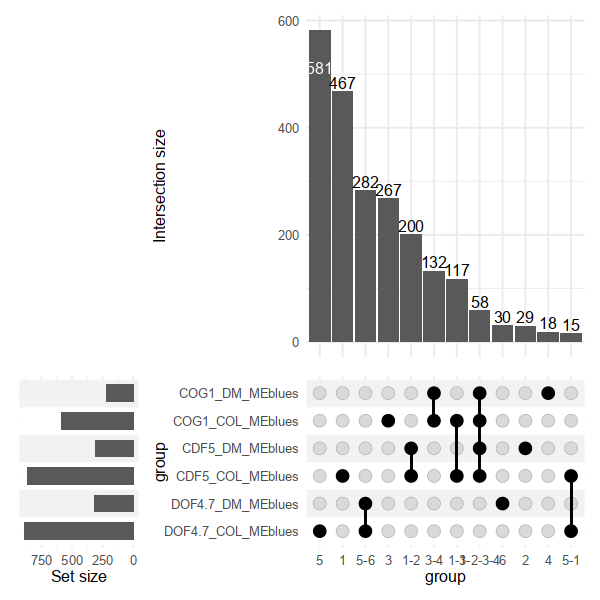

In [45]:
create_matrix_and_plot(list(
    DOF4.7_COL_MEblues = data_list$DOF4.7_AT4G38000_COL_bound_in_MEblue %>% rbind(data_list$DOF4.7_AT4G38000_COL_bound_in_MEpurple),
    DOF4.7_DM_MEblues = data_list$DOF4.7_AT4G38000_DM_bound_in_MEblue %>% rbind(data_list$DOF4.7_AT4G38000_DM_bound_in_MEpurple),
    CDF5_COL_MEblues = data_list$CDF5_AT1G69570_COL_bound_in_MEblue %>% rbind(data_list$CDF5_AT1G69570_COL_bound_in_MEpurple),
    CDF5_DM_MEblues = data_list$CDF5_AT1G69570_DM_bound_in_MEblue %>% rbind(data_list$CDF5_AT1G69570_DM_bound_in_MEpurple),
    COG1_COL_MEblues = data_list$COG1_AT1G29160_COL_bound_in_MEblue %>% rbind(data_list$COG1_AT1G29160_COL_bound_in_MEpurple),
    COG1_DM_MEblues = data_list$COG1_AT1G29160_DM_bound_in_MEblue %>% rbind(data_list$COG1_AT1G29160_DM_bound_in_MEpurple)),
                       'V3', uniqueness = TRUE, './plots/upset_plot_repressors_blues.pdf')

In [47]:
result <- create_matrix_and_plot(list(
    DOF4.7_COL_MEruby = DOF4.7_COL_bound_in_MEruby, DOF4.7_DM_MEruby = DOF4.7_DM_bound_in_MEruby, 
    CDF5_COL_MEruby = CDF5_COL_bound_in_MEruby, CDF5_DM_MEruby = CDF5_DM_bound_in_MEruby, 
    COG1_COL_MEruby = COG1_COL_bound_in_MEruby, COG1_DM_MEruby = COG1_DM_bound_in_MEruby),
                       'V10', uniqueness = TRUE,'./plots/upset_plot2.pdf')

ERROR: Error in eval(expr, envir, enclos): object 'DOF4.7_COL_bound_in_MEruby' not found


In [ ]:
DOF4.7_unique_bound_in_MEblue <- DOF4.7_COL_bound_in_MEblue %>% anti_join(DOF4.7_DM_bound_in_MEblue, by = c("V1", "V2", "V3")) %>% 
    pull(V14) %>% unique

In [ ]:
DOF4.7_DM_unique_bound_in_MEblue <- DOF4.7_DM_bound_in_MEblue %>% anti_join(DOF4.7_COL_bound_in_MEblue, by = c("V1", "V2", "V3")) %>% pull(V14) %>% unique

In [ ]:
DOF4.7_DM_bound_in_MEblue %>% anti_join(DOF4.7_COL_bound_in_MEblue, by = c("V1", "V2", "V3")) %>% pull(V14) %>% unique

In [ ]:
library(dplyr)
library(clusterProfiler)
library(org.At.tair.db)

In [ ]:
enrich_func <- function(genes) {
    enrichGO(gene = genes,
             OrgDb = org.At.tair.db,
             keyType = "TAIR",
             ont = "BP",
             pAdjustMethod = "BH",
             qvalueCutoff = 0.05)
  }

In [ ]:
GO_DOF4.7_unique_bound_in_MEblue <- enrich_func(DOF4.7_unique_bound_in_MEblue)

In [ ]:
GO_DOF4.7_unique_bound_in_MEblue %>% as.data.frame

In [ ]:
dotplot(GO_DOF4.7_unique_bound_in_MEblue)

In [ ]:
enrich_func(COG1_MEblues_lost_common$V13) %>% dotplot( title = 'co-lost')

In [ ]:
enrich_func(lost_target_genes) %>% dotplot( title = 'all lost')

In [ ]:
GO_DOF4.7_DM_unique_bound_in_MEblue <- enrich_func(DOF4.7_DM_unique_bound_in_MEblue)

In [ ]:
COG1_MEblues_lost_common %>% 

### thinking about all activators and repressors in MEruby and MEblue

In [ ]:
# Directory path
dir_path <- "/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/TOBIAS/BINDetect_output_v3"

# List all files in the directory
files <- list.files(path = dir_path, recursive = TRUE, full.names = TRUE)

# Function to read, add source file column, and bind files based on a pattern
read_and_bind_with_source <- function(files, pattern) {
  # Filter files based on pattern
  pattern_files <- grep(pattern, files, value = TRUE)
  # Read each file and add a column for the source file name
  data_list <- lapply(pattern_files, function(file) {
    df <- read.csv(file, header = FALSE, sep = "\t")
    df$source_file <- basename(file)  # Add source file column
    return(df)
  })
  # Combine all dataframes
  combined_df <- do.call(rbind, data_list)
  return(combined_df)
}

# Read and combine files into respective dataframes with source file information
COL_bound_in_MEblue <- read_and_bind_with_source(files, "_COL_bound_in_MEblue.bed")
DM_bound_in_MEblue <- read_and_bind_with_source(files, "_DM_bound_in_MEblue.bed")
COL_bound_in_MEruby <- read_and_bind_with_source(files, "_COL_bound_in_MEruby.bed")
DM_bound_in_MEruby <- read_and_bind_with_source(files, "_DM_bound_in_MEruby.bed")


In [ ]:
COL_bound_in_MEblue

In [ ]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')

In [ ]:
diffTF_result <- read.csv(
    '/media/HDD2/donghui/diffTF_ath/diffTF/example/stable/output_2DMs_correct/FINAL_OUTPUT/extension100/COLvsDM.all.summary.tsv',
    sep = '\t') %>% arrange(pvalueAdj)

diffTF_result <- diffTF_result %>% filter(pvalueAdj < 0.02, classification_q0.001_final %in% c("activator", "repressor"))  %>% left_join(map_id_name, by = c( 'TF' = 'gene_id' ))
diffTF_result

In [ ]:
diffTF_result %>% filter(classification_q0.001_final == "repressor")

### NLRs #

In [ ]:
updated_NLRs_table <- read.csv("../gene_table_and_other_scripts/Col-0_NLRs_167_Ya-Long_Donghui_20240321.csv") %>% 
    select(AGI, Class, Primary.Gene.Symbol)
updated_NLRs_table

In [ ]:
library(dplyr)
library(readr)

# Base directory path
base_dir <- "/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/TOBIAS/BINDetect_output_v3"

process_tf_directory_for_NLR <- function(tf_name, nlr_table) {
  # Construct full directory path
  tf_dir <- file.path(base_dir, tf_name)

  # Define file paths
  input_bed_dir <- file.path(tf_dir, "beds")
  output_dir <- file.path(tf_dir, "beds", "NLR_output")

  # Create output directory if it does not exist
  if (!dir.exists(output_dir)) {
    dir.create(output_dir)
  }

  # List all bed files in the input directory, excluding 'all.bed'
  bed_files <- list.files(input_bed_dir, pattern = "\\.bed$", full.names = TRUE)
  bed_files <- bed_files[!grepl("all\\.bed$", bed_files)]

  # Function to filter and write out BED files
  create_filtered_bed_files <- function(bed_file_path, nlr_table, output_dir) {
    bed_file <- read_delim(bed_file_path, delim = "\t", col_names = FALSE)

    filtered_bed <- bed_file %>%
                    filter(X13 %in% nlr_table$AGI)

    # Generate a safe file name
    base_name <- basename(bed_file_path)
    file_name <- paste0(tools::file_path_sans_ext(base_name), "_NLR_filtered.bed")
    write_tsv(filtered_bed, file.path(output_dir, file_name), col_names = FALSE)
  }

  # Process each bed file
  for (bed_file_path in bed_files) {
    create_filtered_bed_files(bed_file_path, nlr_table, output_dir)
  }
}

# Example usage
process_tf_directory_for_NLR('DOF4.7_AT4G38000', updated_NLRs_table)
process_tf_directory_for_NLR('WRKY18_AT4G31800', updated_NLRs_table)

In [ ]:
# Get list of TF directories
tf_directories <- list.files(base_dir, full.names = TRUE)

# Loop over each TF directory and process it
for (tf_dir in tf_directories) {
  # Extract the TF name from the directory path
  tf_name <- basename(tf_dir)

  # Process the TF directory
  process_tf_directory_for_NLR(tf_name, updated_NLRs_table)
}


### TIRs

In [ ]:
NLRs_and_TIRs <- read.csv(file = "../gene_table_and_other_scripts/NLRs_and_TIR_only.csv") 

In [ ]:
NLRs_and_TIRs 

In [ ]:
library(dplyr)
library(readr)

# Base directory path
base_dir <- "/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/TOBIAS/BINDetect_output_v3"

process_tf_directory_for_NLR <- function(tf_name, nlr_table) {
  # Construct full directory path
  tf_dir <- file.path(base_dir, tf_name)

  # Define file paths
  input_bed_dir <- file.path(tf_dir, "beds")
  output_dir <- file.path(tf_dir, "beds", "TIR_output")

  # Create output directory if it does not exist
  if (!dir.exists(output_dir)) {
    dir.create(output_dir)
  }

  # List all bed files in the input directory, excluding 'all.bed'
  bed_files <- list.files(input_bed_dir, pattern = "\\.bed$", full.names = TRUE)
  bed_files <- bed_files[!grepl("all\\.bed$", bed_files)]

  # Function to filter and write out BED files
  create_filtered_bed_files <- function(bed_file_path, nlr_table, output_dir) {
    bed_file <- read_delim(bed_file_path, delim = "\t", col_names = FALSE)

    filtered_bed <- bed_file %>%
                    filter(X13 %in% nlr_table$AGI)

    # Generate a safe file name
    base_name <- basename(bed_file_path)
    file_name <- paste0(tools::file_path_sans_ext(base_name), "_TIR_filtered.bed")
    write_tsv(filtered_bed, file.path(output_dir, file_name), col_names = FALSE)
  }

  # Process each bed file
  for (bed_file_path in bed_files) {
    create_filtered_bed_files(bed_file_path, nlr_table, output_dir)
  }
}

# Example usage
process_tf_directory_for_NLR('DOF4.7_AT4G38000', NLRs_and_TIRs)
process_tf_directory_for_NLR('WRKY18_AT4G31800', NLRs_and_TIRs)

In [ ]:
# Load necessary libraries
library(parallel)
library(dplyr)

# List all overview.txt files
file_list <- list.files(path ='/media/HDD2/donghui/bulk_ATAC_DM1_DM2d/TOBIAS/BINDetect_output_v3'  , pattern = "overview\\.txt$", recursive = TRUE, full.names = TRUE)
file_list %>% length
file_list

In [ ]:
# Define a function to read a file and add a source column
read_file <- function(file) {
  df <- read.table(file, header = TRUE, sep = "\t")
  df$source <- file
  return(df)
}

# Use mclapply with parallel processing to read each file
# Set mc.cores to the desired number of cores
df_list <- mclapply(file_list, read_file, mc.cores = 100)

# Combine all dataframes into one
combined_df <- bind_rows(df_list)

# Inspect the first few rows of the combined dataframe
head(combined_df)

In [ ]:
combined_df <- combined_df %>% mutate(source = source %>% basename %>% str_replace_all("_overview.txt", ""))
head(combined_df)

In [ ]:
combined_df_any_bound <- combined_df %>% dplyr::filter(COL_bound == 1 | DM_bound == 1)

In [ ]:
combined_df_DM_bound_unique <- combined_df %>% dplyr::filter(DM_bound == 1 & COL_bound == 0) 
combined_df_COL_bound_unique <- combined_df %>% dplyr::filter(COL_bound == 1 & DM_bound == 0)

In [ ]:
up_TIR_containing <- readRDS('/media/HDD2/donghui/Pathogen_JC14_3DM/Rdata/up_TIR_containing.rds')
TIR_containing <- readRDS('/media/HDD2/donghui/Pathogen_JC14_3DM/Rdata/TIR_containing.rds')

In [ ]:
up_TIR_containing_in_any_condition <- unlist(up_TIR_containing) %>%  unique
up_TIR_containing_in_any_condition %>% length
TIR_not_up_in_any_condition <- TIR_containing$AGI %>% setdiff(up_TIR_containing_in_any_condition) 
TIR_not_up_in_any_condition %>% length

In [ ]:
TIR_venn_genes_info <- readRDS('/media/HDD2/donghui/Pathogen_JC14_3DM/Rdata/TIR_venn_genes_info.rds')
TIR_venn_genes_info

In [ ]:
TIR_venn_genes_info$total_overlap

In [ ]:
TIR_not_up_in_any_condition

In [ ]:
non_DEG_DM = combined_df_DM_bound_unique %>% filter(gene_id %in% TIR_not_up_in_any_condition) 
DEG_DM = combined_df_DM_bound_unique %>% filter(gene_id %in% TIR_venn_genes_info$total_overlap) 
non_DEG_COL = combined_df_COL_bound_unique %>% filter(gene_id %in% TIR_not_up_in_any_condition) 
DEG_COL = combined_df_COL_bound_unique %>% filter(gene_id %in% TIR_venn_genes_info$total_overlap)

In [ ]:
TIR_bound_list <- list(TIR_up_DM = DEG_DM, TIR_not_up_DM = non_DEG_DM, TIR_up_COL = DEG_COL, TIR_not_up_COL = non_DEG_COL)

In [ ]:
upset_TIR <-create_matrix_and_plot( TIR_bound_list,
                       'TFBS_name', uniqueness = FALSE, './plots/upset_plot_TIR.pdf')

In [ ]:
all_df <- bind_rows(
    DEG_DM %>% mutate(group = "DEG_DM"),
    non_DEG_DM %>% mutate(group = "non_DEG_DM"),
    DEG_COL %>% mutate(group = "DEG_COL"),
    non_DEG_COL %>% mutate(group = "non_DEG_COL")
  )

tfbs_counts <- all_df %>%
    count(TFBS_name, group) %>%
    spread(group, n, fill = 0)

all_df %>% group_by(group) %>% summarise(count = n())
tfbs_counts

In [ ]:
library(dplyr)
library(tidyr)
library(purrr)

# Function to conduct Fisher's Exact Test
perform_fisher_test <- function(deg_col, non_deg_col, deg_dm, non_deg_dm) {
  # Create a contingency table
  data <- matrix(c(deg_col, non_deg_col, deg_dm, non_deg_dm), nrow = 2)

  # Check for applicability of Fisher's test
  if (all(rowSums(data) > 0) && all(colSums(data) > 0)) {
    test_result <- fisher.test(data, simulate.p.value = TRUE, B = 2000)
    return(list(statistic = test_result$statistic, p.value = test_result$p.value))
  } else {
    return(list(statistic = NA, p.value = NA))
  }
}

# Apply Fisher's Exact Test to each TFBS
tfbs_enriched <- tfbs_counts %>%
  mutate(
    test_results = pmap(list(DEG_COL, non_DEG_COL, DEG_DM, non_DEG_DM), perform_fisher_test)
  ) %>%
  unnest_wider(test_results) 
# View results
tfbs_enriched %>% arrange(p.value) %>% head

In [ ]:
# Load necessary library
library(MASS)

# Assuming tfbs_counts is your dataframe
# Transform your data to long format for GLM
long_data <- reshape2::melt(tfbs_counts, id.vars = "TFBS_name")

# Fit a Poisson model (you've already done this)
glm_model <- glm(value ~ TFBS_name + variable, family = poisson(link = "log"), data = long_data)

# Extract the summary from the correct model variable
glm_model_summary <- summary(glm_model)

# Extract the coefficients summary directly from the correct model variable
coefficients_summary <- glm_model_summary$coefficients

# Convert the summary to a dataframe
coefficients_df <- as.data.frame(coefficients_summary)

# Add row names as a new column (which are your predictor names)
coefficients_df$Predictor <- rownames(coefficients_df)

# Rename the columns for clarity
names(coefficients_df) <- c("Estimate", "Std.Error", "z.value", "p.value", "Predictor")

# Arrange the dataframe by p-value
library(dplyr)
sorted_df <- coefficients_df %>%
    arrange(p.value)

# View the sorted dataframe
# print(sorted_df)



In [ ]:
sorted_df